In [4]:
TOKEN = "BQC8K6KohM-hewi1fZSMR2t-2IRrMUZSRUaU3of94hlQ_sDarfOU5n72O0C4UKwMZgfbyaj5FvuCfd3CCLYoXE1FtFU_wCWoVNoE2rkaFGGnvtVjX2QZulDo-P9KtqtJB9KosQnQv161sk7vf8owNAyQrOHfaH8q_INgF2d7dG59Mg"

In [2]:
import json
import requests
from furl import furl
from math import ceil

import pandas as pd
import matplotlib

%matplotlib inline

In [5]:
url = "https://api.spotify.com/v1/me/tracks"
headers = {'Authorization': "Bearer {}".format(TOKEN)}
r = requests.get(url, headers=headers)
parsed = json.loads(r.text)
count_songs = parsed["total"]
print("Total number of songs: {}".format(count_songs))

Total number of songs: 808


In [6]:
all_songs = []

for i in range(int(ceil(count_songs/50.0))):
    offset = 50*i
    url = "https://api.spotify.com/v1/me/tracks?limit=50&offset={}".format(offset)
    headers = {'Authorization': "Bearer {}".format(TOKEN)}
    r = requests.get(url, headers=headers)
    parsed = json.loads(r.text)
    
    all_songs.extend(parsed["items"])
    
print("Number of gathered songs: {}".format(len(all_songs)))   

Number of gathered songs: 808


In [7]:
print("===========================================================================")
print("===========================================================================")
print(all_songs[0]['track'].keys())
print(all_songs[0]['track']['preview_url'])


dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])
https://p.scdn.co/mp3-preview/e491a9d3850918aae756ec4c76dea52dca01860f?cid=08c15eb1ecef4a339c36fea26459ea5d


In [20]:
import urllib


ModuleNotFoundError: No module named 'pydub'

In [3]:
import urllib.request
import scipy.io.wavfile
import pydub

temp_folder = '/home/lildreamz/Programming/jupyter_notebooks/spotify_analysis/'

web_file = 'https://p.scdn.co/mp3-preview/b976b2d59cef957286a49ae0eb22851484115242?cid=08c15eb1ecef4a339c36fea26459ea5d'

# Download file
data = urllib.request.urlretrieve(web_file,temp_folder+"file.mp3")

mp3 = pydub.AudioSegment.from_mp3(temp_folder + "file.mp3")

mp3.export(temp_folder+"file.wav", format="wav")

rate, audData  = scipy.io.wavfile.read(temp_folder+"file.wav")


print(rate)
print(audData)


44100
[[ -5815 -10144]
 [ -9784 -14572]
 [-13034 -17545]
 ...
 [ -7363  -1727]
 [ -7667  -2359]
 [ -5592  -1978]]


In [8]:
#wav length
audData.shape[0] / rate

30.00002267573696

In [11]:
#wav number of channels mono/stereo
audData.shape[1]
#if stereo grab both channels
channel1=audData[:,0] #left
channel2=audData[:,1] #right

In [14]:
audData.dtype

dtype('int16')

In [16]:
import numpy as np
import matplotlib.pyplot as plt



In [17]:
np.sum(channel1.astype(float)**2)



143310231439546.0

In [18]:
1.0/(2*(channel1.size)+1)*np.sum(channel1.astype(float)**2)/rate



1228.1411290946555

In [19]:
audData.shape[0]

1323001

In [20]:
 np.arange(0, float(audData.shape[0]), 1)

array([0.000000e+00, 1.000000e+00, 2.000000e+00, ..., 1.322998e+06,
       1.322999e+06, 1.323000e+06])

In [21]:
np.arange


<function numpy.core.multiarray.arange>

In [22]:
float(audData.shape[0])

1323001.0

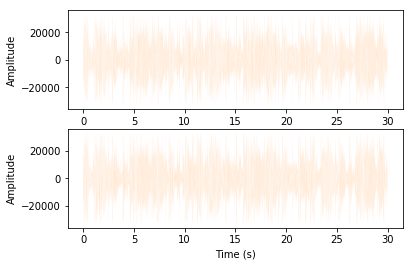

In [25]:
import matplotlib.pyplot as plt

#create a time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1) / rate
#plot amplitude (or loudness) over time
plt.figure(1)
plt.subplot(211)
plt.plot(time, channel1, linewidth=0.01, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(time, channel2, linewidth=0.01, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

/home/lildreamz/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

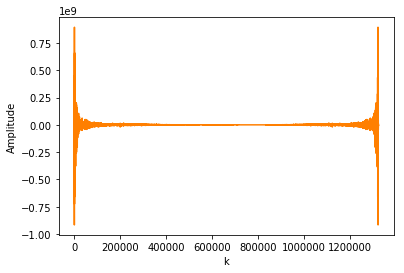

In [26]:
from numpy import fft as fft

fourier=fft.fft(channel1)

plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as ms
#ms.use('seaborn-muted')
%matplotlib inline

import librosa 
import librosa.display

In [4]:
temp_folder = '/home/lildreamz/Programming/jupyter_notebooks/spotifyAnalysis/songs/'

audio_path = temp_folder + "file.wav"

y, sr = librosa.load(audio_path)

# Mel Spectogram

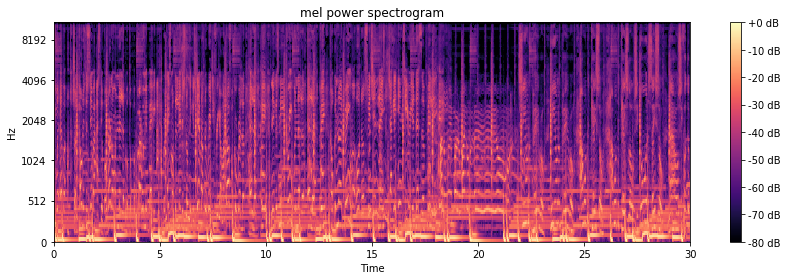

In [5]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128) 
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))

librosa.display.specshow(log_S, sr=sr, x_axis = 'time', y_axis='mel')
 
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

# Harmonic-percussive source separation

The aim of the Harmonic/Percussive separation is to decompose the original music signal to the harmonic (i.e. pitched instruments) and the percussive (non pitched instruments, percussion) parts of the signal. Such methods can be applied to audio mixing software, or can be adopted as preprocessing on other Music Information Retrieval Methods such as rhythm analysis or chord/tonality recognition.

In [6]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

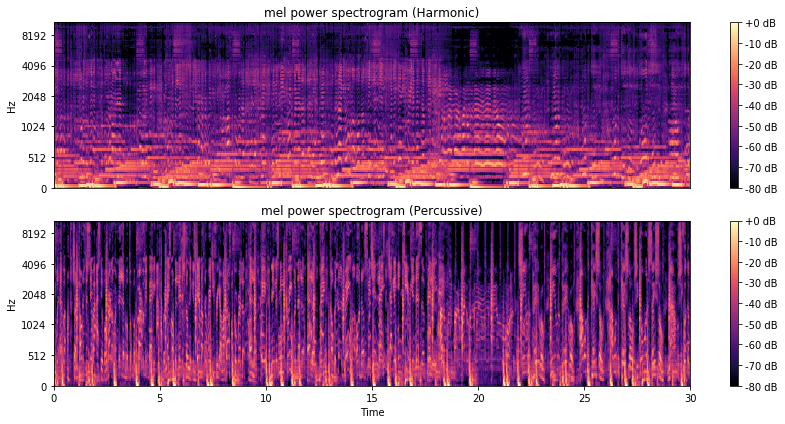

In [7]:

# Ddisplay a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

# Chromagram

Pitch class (or chroma) representations
are often used to encode harmony while suppressing variations
in octave height, loudness, or timbre.

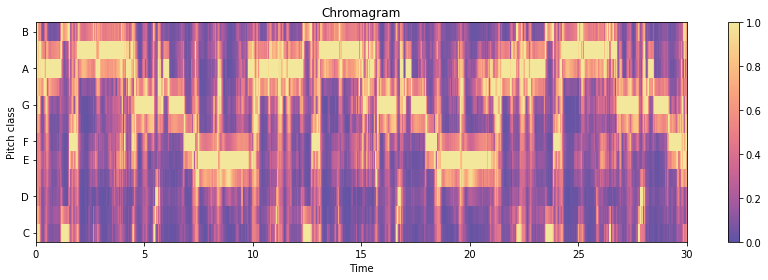

In [8]:
# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
D = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax

# from palettable.cartocolors.sequential import Sunset_7_r
# from palettable.cartocolors.sequential import PurpOr_6
# from palettable.cartocolors.sequential import Magenta_7_r
from palettable.cartocolors.sequential import Sunset_7_r
from palettable.cmocean.sequential import Matter_20_r

librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1,  cmap = Sunset_7_r.mpl_colormap)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()



In [12]:
print(sr)

22050


# MFCC
Mel-frequency cepstral coefficients are commonly used to represent **texture** or **timbre** of sound.

In music, **texture** is how the melodic, rhythmic, and harmonic materials are combined in a composition, thus determining the overall quality of the sound in a piece. Texture is often described in regard to the density, or thickness, and range, or width, between lowest and highest pitches, in relative terms as well as more specifically distinguished according to the number of voices, or parts, and the relationship between these voices. For example, a thick texture contains many “layers” of instruments.


**Timbre** is the perceived sound quality of a musical note, sound or tone. 


#### Mel-Frequency cepstrum

In sound processing, the **mel-frequency cepstrum (MFC)** is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. 

**power spectrum:**

For a given signal, the power spectrum gives a plot of the portion of a signal's power (energy per unit time) falling within given frequency bins

/home/lildreamz/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


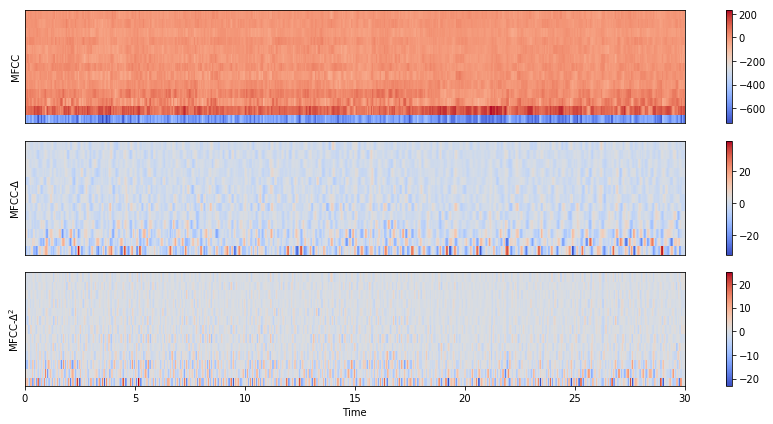

In [22]:


# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])



# Beat tracking

Beat tracker returns an estimate of the tempo (beats/min) and frame indices of beat events.



/home/lildreamz/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


<Figure size 864x432 with 0 Axes>

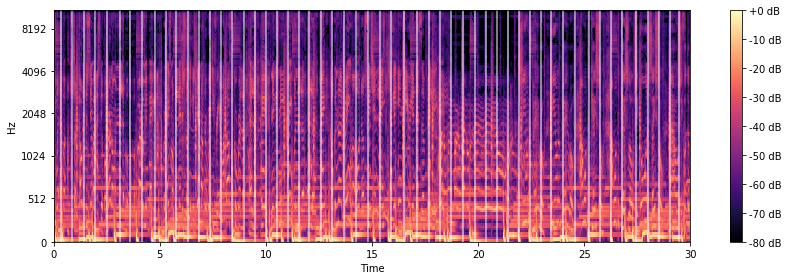

In [23]:
# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)
# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

# Beat-synchronous feature aggregation

Beat event theu can be used to summarize the feauture of each beat.

This can be useful for reducing data dimensionality, and removing transient noise from the features.

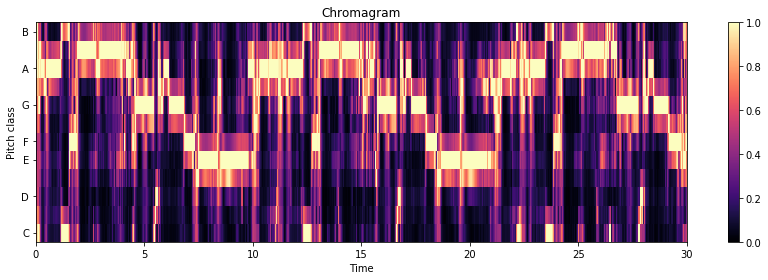

In [24]:
# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()



In [99]:
import urllib
import pydub
import scipy.io.wavfile


temp_folder = '/home/lildreamz/Programming/jupyter_notebooks/spotify_analysis/'

web_file="http://p.scdn.co/mp3-preview/35b4ce45af06203992a86fa729d17b1c1f93cac5"
# Download file
data = urllib.request.urlretrieve(web_file,temp_folder+"file2.mp3")

mp3 = pydub.AudioSegment.from_mp3(temp_folder + "file2.mp3")

mp3.export(temp_folder+"file2.wav", format="wav")

rate, audData  = scipy.io.wavfile.read(temp_folder+"file2.wav")


print(rate)
print(audData)



44100
[[-480  686]
 [-213 1268]
 [-288 1221]
 ...
 [4484 4267]
 [4907 4697]
 [3300 3183]]


In [100]:
audio_path = temp_folder + "file2.wav"

y2, sr2 = librosa.load(audio_path)

In [101]:
y_harmonic2, y_percussive2 = librosa.effects.hpss(y2)

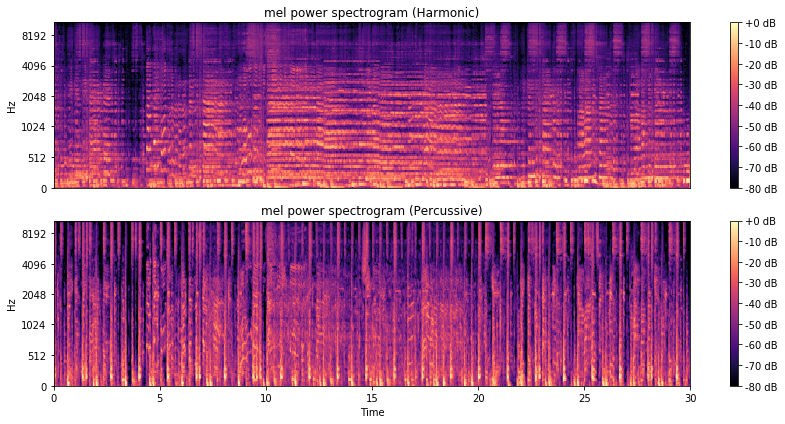

In [102]:

# Ddisplay a mel-scaled power (energy-squared) spectrogram
S_harmonic2   = librosa.feature.melspectrogram(y_harmonic2, sr=sr2)
S_percussive2 = librosa.feature.melspectrogram(y_percussive2, sr=sr2)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh2 = librosa.power_to_db(S_harmonic2, ref=np.max)
log_Sp2 = librosa.power_to_db(S_percussive2, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh2, sr=sr2, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp2, sr=sr2, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

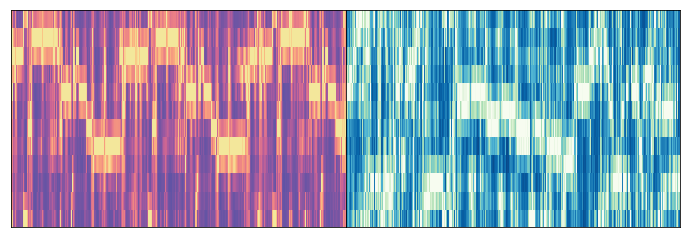

In [200]:
import matplotlib.gridspec as gridspec

C = librosa.feature.chroma_cqt(y=y_harmonic2, sr=sr2)
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.0, hspace=0.05)
# Make a new figure
#plt.figure(figsize=(12,4))
plt.figure( figsize=(12,4))

from palettable.cartocolors.sequential import Sunset_7_r
# from palettable.cartocolors.sequential import PurpOr_6
# from palettable.cartocolors.sequential import Magenta_7_r
from palettable.colorbrewer.sequential import GnBu_9_r

plt.subplot(gs1[0])
librosa.display.specshow(D, sr=sr,  vmin=0, vmax=1,  cmap = Sunset_7_r.mpl_colormap)
plt.subplot(gs1[1])
librosa.display.specshow(C, sr=sr2, vmin=0, vmax=1,  cmap = GnBu_9_r.mpl_colormap)
#plt.subplots_adjust(wspace=0, hspace=0)

#plt.tight_layout()

In [11]:
TOKEN = 'BQA4eBWv18Gg9C0rS0s732W4rXYo2Rk0kbXPgQ0UcGm8HLdH3uWg2LHXUOoFQjbcNF_apGZ12WDkefW1MA-1TI88FPjNREh4aOnKiz43mwjW7R-eBlrB0m92_TQpvavG9Ac6HFyJA4UDcAXzCYgt0HWaxxtR6Zidhhj0VCXJrMsBNey1'

In [1]:
import json
import requests
from furl import furl
import urllib
import scipy.io.wavfile
import pydub
from random import shuffle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

%matplotlib inline

import librosa 
import librosa.display

In [13]:
url = "https://api.spotify.com/v1/me/playlists"
headers = {'Authorization': "Bearer {}".format(TOKEN)}
r = requests.get(url, headers=headers)
parsed = json.loads(r.text)

In [14]:
playlists = parsed['items']





for playlist in playlists:
    if playlist['collaborative'] == True:
        print(playlist)
        
    

{'collaborative': True, 'external_urls': {'spotify': 'https://open.spotify.com/playlist/4zPScbIBFDKIKtCM3PvuJV'}, 'href': 'https://api.spotify.com/v1/playlists/4zPScbIBFDKIKtCM3PvuJV', 'id': '4zPScbIBFDKIKtCM3PvuJV', 'images': [{'height': 640, 'url': 'https://mosaic.scdn.co/640/797e59fba47111923b437733b8bd0ceb03b795758b8c2d541300c4d13eb1cb5be80c26c1a94956fc92501ad97eba0f22b05aca03d90937dc4af2735ba0ce5df98bce411863c24fa4904523bc5030affe', 'width': 640}, {'height': 300, 'url': 'https://mosaic.scdn.co/300/797e59fba47111923b437733b8bd0ceb03b795758b8c2d541300c4d13eb1cb5be80c26c1a94956fc92501ad97eba0f22b05aca03d90937dc4af2735ba0ce5df98bce411863c24fa4904523bc5030affe', 'width': 300}, {'height': 60, 'url': 'https://mosaic.scdn.co/60/797e59fba47111923b437733b8bd0ceb03b795758b8c2d541300c4d13eb1cb5be80c26c1a94956fc92501ad97eba0f22b05aca03d90937dc4af2735ba0ce5df98bce411863c24fa4904523bc5030affe', 'width': 60}], 'name': 'earle and tiff ', 'owner': {'display_name': 'Tiffany Koval', 'external_urls': 

In [15]:
playlist_Id = '4zPScbIBFDKIKtCM3PvuJV'

In [16]:
url = "https://api.spotify.com/v1/playlists/4zPScbIBFDKIKtCM3PvuJV"
headers = {'Authorization': "Bearer {}".format(TOKEN)}
r = requests.get(url, headers=headers)
parsed = json.loads(r.text)

In [17]:
total_songs = parsed['tracks']['total']

In [18]:
parsed['tracks']['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [19]:
parsed['tracks']['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [20]:
parsed['tracks']['items'][0]['added_by']['id']

'tknoodle1'

In [21]:
parsed['tracks']['items'][0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [22]:
parsed['tracks']['items'][0]['track']['preview_url']

'https://p.scdn.co/mp3-preview/9a55649cd7f1c63798f184c2f4ea6aba34daf4b9?cid=08c15eb1ecef4a339c36fea26459ea5d'

In [23]:
parsed['tracks']['items'][0]['track']['name']

'BULLETS'

In [2]:
songs = parsed['tracks']['items']
meta_data = []

temp_folder = '/home/lildreamz/Programming/jupyter_notebooks/spotifyAnalysis/songs/'

for song in songs:
    added_by = song['added_by']['id']
    name = song['track']['name']
    name = name.replace(" ", "")
    web_file = song['track']['preview_url']
    if web_file == None:
        meta_data.append({"add_by": added_by, "name": name, "filename": "NoFile"})
        continue
    filename = added_by + "_" + name 
    meta_data.append({"add_by": added_by, "name": name, "filename": filename})
    print("Song name: %s. Was added by: %s.\nFILENAME: %s. link=%s\n"%(name, added_by, filename, web_file))
    # Download file
    data = urllib.request.urlretrieve(web_file,temp_folder + filename + ".mp3")
    mp3 = pydub.AudioSegment.from_mp3(temp_folder + filename + ".mp3")
    mp3.export(temp_folder + filename +".wav", format="wav")
    rate, audData  = scipy.io.wavfile.read(temp_folder+"file.wav")
    print("rate: %r\n"%(rate))


NameError: name 'parsed' is not defined

In [35]:
count = 0
for file in meta_data:
    if file['add_by'] == "earleag":
        print("song %s added by: %s"%(file['name'], file['add_by']))

song InChains added by: earleag
song Baby added by: earleag
song Lying&Loving(feat.Mothica) added by: earleag
song Daybreak added by: earleag
song Bounce added by: earleag
song BadBadNews added by: earleag
song Look@Ugo added by: earleag
song NightJob added by: earleag
song SideB[DopeSong] added by: earleag
song Dubstep(feat.Scrufizzer) added by: earleag
song Lie4 added by: earleag
song IWill added by: earleag
song Fades added by: earleag
song HearFromYou added by: earleag
song WarmAnimal added by: earleag


In [3]:
from palettable.colorbrewer.sequential import GnBu_9_r
from palettable.cartocolors.sequential import Sunset_7_r
data_folder = '/home/lildreamz/Programming/jupyter_notebooks/spotifyAnalysis/'
song_folder = '/home/lildreamz/Programming/jupyter_notebooks/spotifyAnalysis/songs/'
chromas = []
e_chromas = []
t_chromas = []
meta_data = np.load(data_folder+"playlist_meta_data.npy")
#plt.figure(figsize=(12,4))
#gs1 = gridspec.GridSpec(6, 7)
#gs1.update(wspace=0.0, hspace=0.0)
gs_ix = 0

for file in meta_data:    
    if file['filename'] == "NoFile":
        continue
    add_by = file['add_by']    
    filename = file['filename']+".wav"
    song_name = file['name']
    audio_path = song_folder + filename
    y, sr = librosa.load(audio_path)
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
    if add_by == 'tknoodle1':
        t_chromas.append({"chroma": C, "sr": sr })
    elif add_by == 'earleag':
        e_chromas.append({"chroma": C, "sr": sr})
    chromas.append({"add_by": add_by, "chroma": C, "sr": sr, "name": song_name})
    #plt.subplot(gs1[gs_ix])
    #if(file['add_by'] == 'tknoodle1'):
    #    librosa.display.specshow(C, sr=sr, vmin=0, vmax=1,  cmap = Sunset_7_r.mpl_colormap)
    #else:
    #    librosa.display.specshow(C, sr=sr, vmin=0, vmax=1,  cmap = GnBu_9_r.mpl_colormap)
    
    gs_ix = gs_ix + 1    
    

In [34]:
for chroma in chromas:
    print(chroma.keys())

dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr', 'name'])
dict_keys(['add_by', 'chroma', 'sr

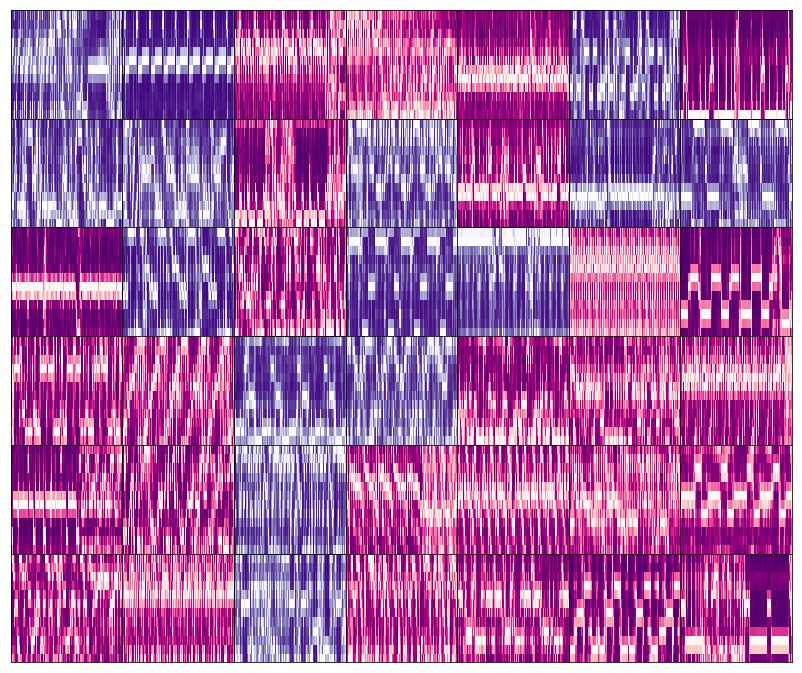

In [75]:
#from palettable.cmocean.sequential import Dense_6_r
#from palettable.colorbrewer.sequential import Purples_7_r
from palettable.colorbrewer.sequential import GnBu_9_r

from palettable.matplotlib import Viridis_3
from palettable.cartocolors.sequential import Sunset_7_r



plt.figure(figsize=(14,12))
gs1 = gridspec.GridSpec(6, 7)
gs1.update(wspace=0.0, hspace=0.0)
gs_ix = 0

all_indices = set(list(range(0,42)))
e_indices = set([0,1,5,7,8,10,12,13,15,17,18,23,24,30,37])
t_indices = all_indices - e_indices

_e_chroma = e_chromas.copy()
_t_chroma = t_chromas.copy()

#Bupu

shuffle(_e_chroma)
shuffle(_t_chroma)
for e in e_indices:
    plt.subplot(gs1[e])
    c = _e_chroma.pop()
    librosa.display.specshow(c['chroma'], sr=c['chroma'], 
                         vmin=0, vmax=1,  cmap =  plt.get_cmap('Purples_r'))
    
for t in t_indices:
    plt.subplot(gs1[t])
    c = _t_chroma.pop()
    librosa.display.specshow(c['chroma'], sr=c['sr'], 
                         vmin=0, vmax=1,  
                             cmap =plt.get_cmap('RdPu_r'))
    
plt.savefig("BuPu_tree.png")    
#shuffle(chromas)
#for chroma in chromas:
#    plt.subplot(gs1[gs_ix])
#    
#    gs_ix = gs_ix + 1    
    #if chroma['add_by'] == 'tknoodle1':
    #   librosa.display.specshow(chroma['chroma'], 
    #                            sr=chroma['sr'], 
    #                           vmin=0, vmax=1,  
    #                          cmap = Sunset_7_r.mpl_colormap)
    #elif chroma['add_by'] == 'earleag':
    #    librosa.display.specshow(chroma['chroma'], 
    #                             sr=chroma['sr'], 
    #                             vmin=0, vmax=1,  
    #                             cmap = plt.get_cmap('Purples_r'))
    
    
#    cmap = plt.get_cmap('Purples_r')

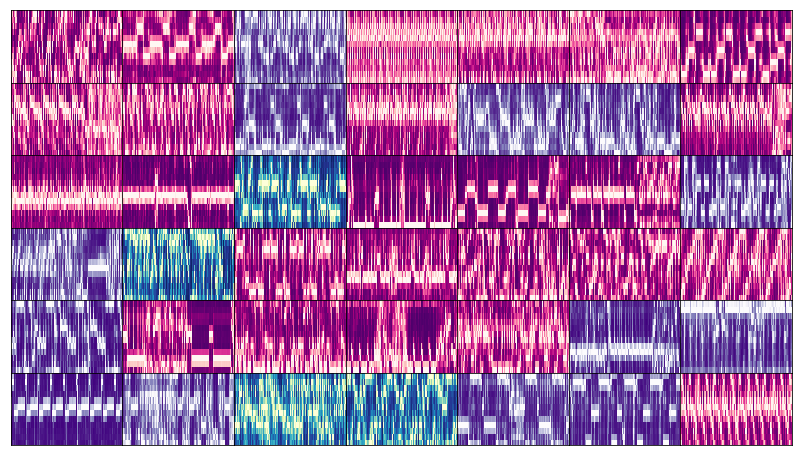

In [76]:
plt.figure(figsize=(14,8))
gs1 = gridspec.GridSpec(6, 7)
gs1.update(wspace=0.0, hspace=0.0)
gs_ix = 0

for chroma in chromas:
    plt.subplot(gs1[gs_ix])
    
    gs_ix = gs_ix + 1    
    if chroma['name'] == 'Dreganomics' or chroma['name'] == 'Casio' or chroma['name'] == 'Fades' or chroma['name'] == 'Look@Ugo':
        librosa.display.specshow(chroma['chroma'], sr=chroma['sr'], 
                                 vmin=0, vmax=1,  
                                 cmap = plt.get_cmap('YlGnBu_r'))
    elif chroma['add_by'] == 'tknoodle1':
        librosa.display.specshow(chroma['chroma'], 
                                sr=chroma['sr'], 
                               vmin=0, vmax=1,  
                              cmap = plt.get_cmap('RdPu_r'))
    elif chroma['add_by'] == 'earleag':        
        librosa.display.specshow(chroma['chroma'], 
                                 sr=chroma['sr'], 
                                 vmin=0, vmax=1,  
                                 cmap = plt.get_cmap('Purples_r'))

plt.savefig("songVizOrdered.png")    


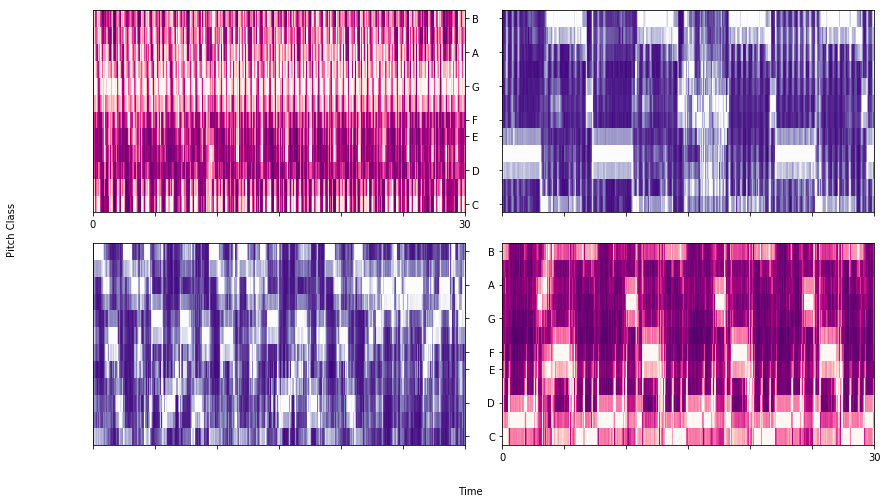

In [77]:

from palettable.cartocolors.sequential import Sunset_7_r
from palettable.colorbrewer.sequential import GnBu_9_r

_e_chroma = e_chromas.copy()
_t_chroma = t_chromas.copy()
shuffle(_e_chroma)
shuffle(_t_chroma)

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0.15,wspace=0.1)
fig.text(0.5, 0.04, 'Time', ha='center')
fig.text(0.04, 0.5, 'Pitch Class', va='center', rotation='vertical')

ax1 = plt.subplot(2,2,1)
c = _t_chroma.pop()
librosa.display.specshow(c['chroma'], sr=c['sr'],
                         vmin=0, vmax=1, 
                         x_axis='time', y_axis='chroma',
                         cmap =  plt.get_cmap('RdPu_r'))
xticks = ax1.xaxis.get_major_ticks()
xticks[1].label1.set_visible(False)
xticks[2].label1.set_visible(False)
xticks[3].label1.set_visible(False)
xticks[4].label1.set_visible(False)
xticks[5].label1.set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.yaxis.tick_right()

ax2 = plt.subplot(2,2,2)    
c = _e_chroma.pop()
librosa.display.specshow(c['chroma'], sr=c['sr'], 
                         x_axis='time', y_axis='chroma',
                               vmin=0, vmax=1,
                        cmap = plt.get_cmap('Purples_r'))

#xticks = ax2.xaxis.get_major_ticks()
#xticks[1].label1.set_visible(False)
#xticks[2].label1.set_visible(False)
#xticks[3].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[5].label1.set_visible(False)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3 = plt.subplot(2,2,3)
c = _t_chroma.pop()
librosa.display.specshow(c['chroma'], sr=c['sr'], 
                         x_axis='time', y_axis='chroma',
                               vmin=0, vmax=1,
                        cmap = plt.get_cmap('Purples_r'))

ax3.set_yticklabels([])
ax3.set_xticklabels([])
#xticks = ax3.xaxis.get_major_ticks()
#xticks[1].label1.set_visible(False)
#xticks[2].label1.set_visible(False)
#xticks[3].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[5].label1.set_visible(False)
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.yaxis.tick_right()



ax4 = plt.subplot(2,2,4)    
c = _e_chroma.pop()
librosa.display.specshow(c['chroma'], sr=c['sr'],
                         vmin=0, vmax=1, 
                         x_axis='time', y_axis='chroma',
                         cmap =  plt.get_cmap('RdPu_r'))

#ax4.set_yticklabels([])
#ax4.set_xticklabels([])
xticks = ax4.xaxis.get_major_ticks()
xticks[1].label1.set_visible(False)
xticks[2].label1.set_visible(False)
xticks[3].label1.set_visible(False)
xticks[4].label1.set_visible(False)
xticks[5].label1.set_visible(False)
ax4.set_xlabel("")
ax4.set_ylabel("")


plt.savefig("zoomedSongs.png")


In [31]:
from numpy import array

a = array(meta_data)
e = np.save("playlist_meta_data",a)
print(e)

None


In [33]:
import numpy as np

temp_folder = '/home/lildreamz/Programming/jupyter_notebooks/spotifyAnalysis/'



array([{'add_by': 'tknoodle1', 'name': 'BULLETS', 'filename': 'tknoodle1_BULLETS'},
       {'add_by': 'tknoodle1', 'name': 'HidingInTheMelody', 'filename': 'tknoodle1_HidingInTheMelody'},
       {'add_by': 'earleag', 'name': 'InChains', 'filename': 'earleag_InChains'},
       {'add_by': 'tknoodle1', 'name': 'Unspoken', 'filename': 'tknoodle1_Unspoken'},
       {'add_by': 'tknoodle1', 'name': 'FakeID', 'filename': 'tknoodle1_FakeID'},
       {'add_by': 'tknoodle1', 'name': 'Elastic', 'filename': 'tknoodle1_Elastic'},
       {'add_by': 'tknoodle1', 'name': 'Love&Pain(KaytranadaRemix)', 'filename': 'tknoodle1_Love&Pain(KaytranadaRemix)'},
       {'add_by': 'tknoodle1', 'name': 'IEnter-OriginalMix', 'filename': 'tknoodle1_IEnter-OriginalMix'},
       {'add_by': 'tknoodle1', 'name': 'SaturatedStatic', 'filename': 'NoFile'},
       {'add_by': 'tknoodle1', 'name': 'PS', 'filename': 'tknoodle1_PS'},
       {'add_by': 'earleag', 'name': 'Baby', 'filename': 'earleag_Baby'},
       {'add_by': 'tk

In [6]:
list(range(0,41))    

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

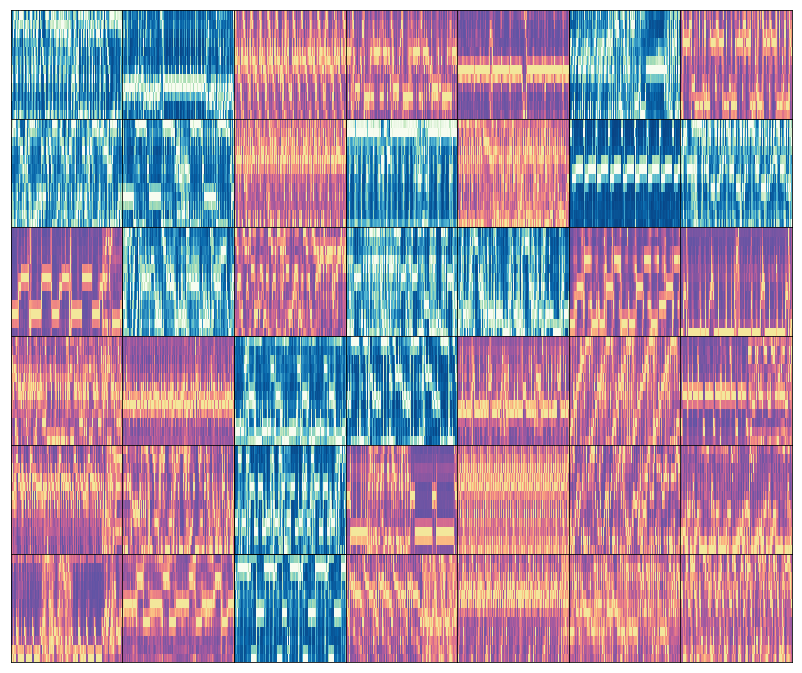

In [43]:
from palettable.cartocolors.sequential import Sunset_7_r
from palettable.colorbrewer.sequential import GnBu_9_r

plt.figure(figsize=(14,12))
gs1 = gridspec.GridSpec(6, 7)
gs1.update(wspace=0.0, hspace=0.0)
gs_ix = 0

all_indices = set(list(range(0,42)))
e_indices = set([0,1,5,7,8,10,12,13,15,17,18,23,24,30,37])
t_indices = all_indices - e_indices

_e_chroma = e_chromas.copy()
_t_chroma = t_chromas.copy()

#Bupu

shuffle(_e_chroma)
shuffle(_t_chroma)
for e in e_indices:
    plt.subplot(gs1[e])
    c = _e_chroma.pop()
    librosa.display.specshow(c['chroma'], sr=c['chroma'], 
                         vmin=0, vmax=1,  cmap =GnBu_9_r.mpl_colormap)
    
for t in t_indices:
    plt.subplot(gs1[t])
    c = _t_chroma.pop()
    librosa.display.specshow(c['chroma'], sr=c['sr'], 
                         vmin=0, vmax=1,  
                             cmap =Sunset_7_r.mpl_colormap)